In [1]:
import torch
import numpy as np
from collections import deque
from ddpg_agent  import Agent
from unityagents import UnityEnvironment

# Note: change the directory below to where you save the Unity environment
env = UnityEnvironment(file_name='/Users/junhui.yang/desktop/submission/Tennis')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)

# size of each action
action_size = brain.vector_action_space_size

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

In [4]:
agent = Agent(state_size = state_size, action_size = action_size, random_seed = 1, num_agents = num_agents)

In [5]:
def ddpg(n_episodes=5000, max_t=2000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores_list = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]    
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            if t % 2 == 0:
                agent.learn_w_freq()
            scores += env_info.rewards
            states = next_states
            if np.any(dones):
                break
        scores_deque.append(np.max(scores))
        scores_list.append(np.max(scores))
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= .5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_list

scores_list = ddpg()

/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.00
Episode 500	Average Score: 0.00
Episode 600	Average Score: 0.00
Episode 700	Average Score: 0.00
Episode 800	Average Score: 0.00
Episode 900	Average Score: 0.00
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.00
Episode 1200	Average Score: 0.00
Episode 1300	Average Score: 0.00
Episode 1400	Average Score: 0.00
Episode 1500	Average Score: 0.00
Episode 1600	Average Score: 0.00
Episode 1700	Average Score: 0.00
Episode 1800	Average Score: 0.00
Episode 1900	Average Score: 0.00
Episode 2000	Average Score: 0.00
Episode 2100	Average Score: 0.00
Episode 2200	Average Score: 0.00
Episode 2300	Average Score: 0.00
Episode 2400	Average Score: 0.01
Episode 2500	Average Score: 0.01
Episode 2600	Average Score: 0.02
Episode 2700	Average Score: 0.03
Episode 2800	Average Score: 0.02
Episode 2900	Average Score: 0.03
Episode 3000	Average Score: 0.08
Episode 3100	Averag

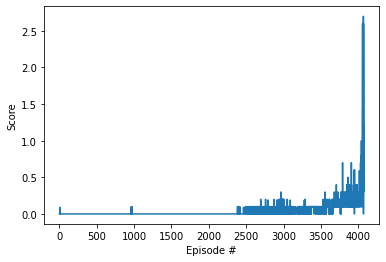

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_list)+1), scores_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()